# 📊 Análise Financeira Estratégica: Extraindo Insights de Movimentações
## O objetivo é explorar dados financeiros — incluindo recebimentos e pagamentos — para identificar padrões críticos, tendências temporais e oportunidades de otimização no fluxo de caixa.
## Utiliza-se o poder do Python para o tratamento estatístico e visualizações avançadas, aliado à acessibilidade do Excel para validação de dados e criação de relatórios executivos.
#Objetivo da Análise
##Responder perguntas estratégicas como:


##-Quais municípios concentram os maiores valores de movimentações?
##-Como o volume financeiro evolui ao longo do tempo?
##-Quais formas de pagamento são mais utilizadas em recebimentos e pagamentos?
##-Existem outliers que merecem atenção?
##-Há discrepâncias entre o número de lojas e volume financeiro por município?
##-Quais são os bancos mais utilizados para cada tipo de movimentação?
##-Existem lojas com movimentações anormais?



In [ ]:
# pegando arquivo no drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CODE PYTHON 3
# Importaçao das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## verificação e tratamento de dados


In [ ]:
# importa a base de dados e buscar informações iniciais
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Base Financeiro.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725 entries, 0 to 2724
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Numero Movimentacao    2725 non-null   int64         
 1   Nome                   2725 non-null   object        
 2   Município              2725 non-null   object        
 3   Data da Movimentacao   2725 non-null   datetime64[ns]
 4   Valor da Movimentação  2725 non-null   float64       
 5   Tipo                   2725 non-null   object        
 6   Banco                  2725 non-null   object        
 7   Imagem                 2725 non-null   object        
 8   Forma Pagamento        2725 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 191.7+ KB


,Numero Movimentacao,Nome,Município,Data da Movimentacao,Valor da Movimentação,Tipo,Banco,Imagem,Forma Pagamento
0,1,Caramuru Pie I,São Paulo,2020-01-02,675.87,Recebimento,Itaú,https://i.ibb.co/DznB5q4/Itau.png,Pix
1,2,Indaia,Belo Horizonte,2020-01-04,1562555.94,Recebimento,Nubank,https://i.ibb.co/LpJM38D/Nubank.png,Boleto
2,3,Diamante Iii,São Paulo,2020-01-04,4970.12,Recebimento,Nubank,https://i.ibb.co/LpJM38D/Nubank.png,Boleto
3,4,Diamante Iii,São Paulo,2020-01-04,6716.79,Recebimento,Nubank,https://i.ibb.co/LpJM38D/Nubank.png,Pix
4,5,Diamante Iii,Vitória,2020-01-04,7072.15,Recebimento,Bradesco,https://i.ibb.co/68RXB19/Bradesco.png,MercadoPago


In [ ]:
# Ajustando nomes das colunas
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('movimentacao', 'movimentação', regex=False)

# apagando colunas desnecessarias
df.drop(columns=['imagem', 'numero movimentação'], inplace=True)

# mudando tipo de dados
df['forma pagamento'] = df['forma pagamento'].astype('category')
df.head()

,nome,município,data da movimentação,valor da movimentação,tipo,banco,forma pagamento
0,Caramuru Pie I,São Paulo,2020-01-02,675.87,Recebimento,Itaú,Pix
1,Indaia,Belo Horizonte,2020-01-04,1562555.94,Recebimento,Nubank,Boleto
2,Diamante Iii,São Paulo,2020-01-04,4970.12,Recebimento,Nubank,Boleto
3,Diamante Iii,São Paulo,2020-01-04,6716.79,Recebimento,Nubank,Pix
4,Diamante Iii,Vitória,2020-01-04,7072.15,Recebimento,Bradesco,MercadoPago


In [ ]:
# valores nulos ou duplicados
print(f'VALORES NULOS:')
print(df.isnull().sum())
print(f'\nVALORES DUPLICADOS: {df.duplicated().sum()}')

VALORES NULOS:
nome                     0
município                0
data da movimentação     0
valor da movimentação    0
tipo                     0
banco                    0
forma pagamento          0
dtype: int64

VALORES DUPLICADOS: 4


## Análise Inicial dos Dados


In [ ]:
df.shape

(2725, 7)

In [ ]:
df.columns

Index(['nome', 'município', 'data da movimentação', 'valor da movimentação',
       'tipo', 'banco', 'forma pagamento'],
      dtype='object')

In [ ]:
df.dtypes

,0
nome,object
município,object
data da movimentação,datetime64[ns]
valor da movimentação,float64
tipo,object
banco,object
forma pagamento,category


In [ ]:
# principais estatisticas
valores = df['valor da movimentação'].values
media = np.mean(valores)
desvio = np.std(valores)
mediana = np.median(valores)
print(f'média: {media}')
print(f'desvio padrão: {desvio}')
print(f'mediana {mediana}')

média: 18252.853585321103
desvio padrão: 290538.85351391823
mediana 3833.5


In [ ]:
df.head()

,nome,município,data da movimentação,valor da movimentação,tipo,banco,forma pagamento
0,Caramuru Pie I,São Paulo,2020-01-02,675.87,Recebimento,Itaú,Pix
1,Indaia,Belo Horizonte,2020-01-04,1562555.94,Recebimento,Nubank,Boleto
2,Diamante Iii,São Paulo,2020-01-04,4970.12,Recebimento,Nubank,Boleto
3,Diamante Iii,São Paulo,2020-01-04,6716.79,Recebimento,Nubank,Pix
4,Diamante Iii,Vitória,2020-01-04,7072.15,Recebimento,Bradesco,MercadoPago


In [ ]:
# estilo dos gráficos
plt.rcParams['figure.figsize'] = (8, 5)
sns.set(style="whitegrid")

<ipython-input-11-749913e7c83b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tipo', y='valor da movimentação', data=graf_1, palette=["#C73E1D", "#083D77"])


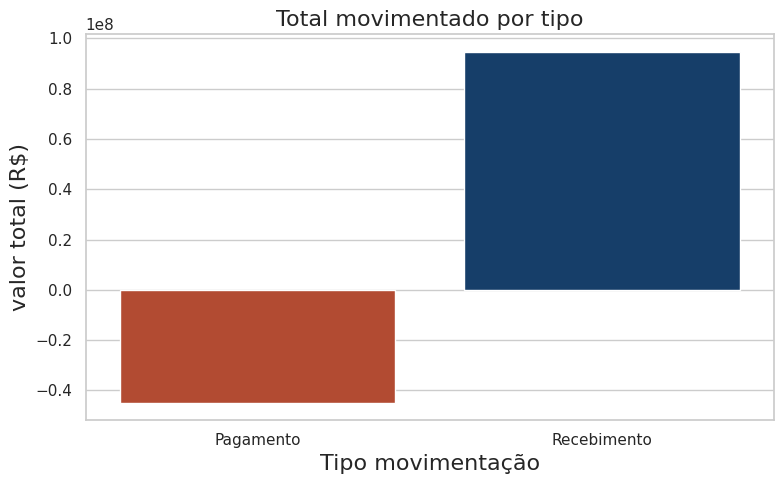

In [ ]:
# Agrupando valores por tipo
graf_1 = df.groupby('tipo')['valor da movimentação'].sum()
graf_1 = pd.DataFrame(graf_1)
graf_1.reset_index(inplace=True)

# Gráfico
sns.barplot(x='tipo', y='valor da movimentação', data=graf_1, palette=["#C73E1D", "#083D77"])
plt.title('Total movimentado por tipo', fontsize=16)
plt.xlabel('Tipo movimentação', fontsize=16)
plt.ylabel('valor total (R$)', fontsize=16)
plt.tight_layout()

In [ ]:
df.head()

,nome,município,data da movimentação,valor da movimentação,tipo,banco,forma pagamento
0,Caramuru Pie I,São Paulo,2020-01-02,675.87,Recebimento,Itaú,Pix
1,Indaia,Belo Horizonte,2020-01-04,1562555.94,Recebimento,Nubank,Boleto
2,Diamante Iii,São Paulo,2020-01-04,4970.12,Recebimento,Nubank,Boleto
3,Diamante Iii,São Paulo,2020-01-04,6716.79,Recebimento,Nubank,Pix
4,Diamante Iii,Vitória,2020-01-04,7072.15,Recebimento,Bradesco,MercadoPago


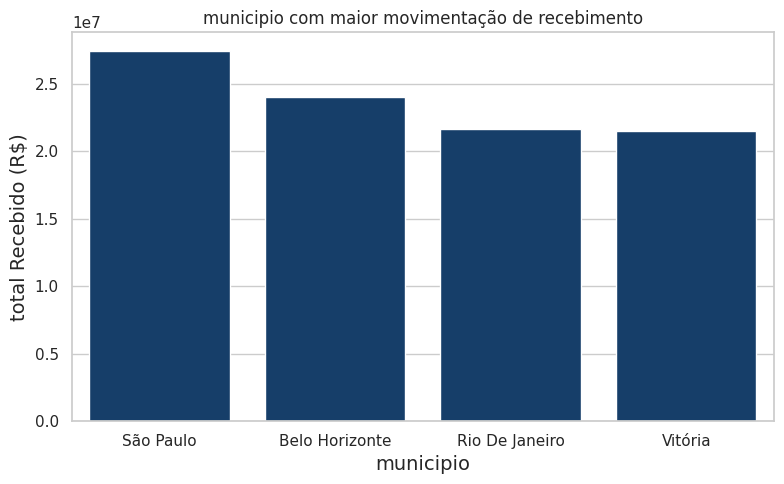

In [ ]:
# municipio com maior movimentação
graf_2 = df[df['tipo'] == 'Recebimento'].groupby('município')['valor da movimentação'].sum().sort_values(ascending=False).head(10)
graf_2 = pd.DataFrame(graf_2).reset_index()

# plotando gráfico
sns.barplot(data=graf_2, x='município', y='valor da movimentação', color="#083D77")
plt.title('municipio com maior movimentação de recebimento', fontsize=12)
plt.xlabel('municipio', fontsize=14)
plt.ylabel('total Recebido (R$)', fontsize=14)
plt.tight_layout()

In [ ]:
#municipios com maiores movimentações
df[df['tipo'] == 'Recebimento'].groupby('município')['valor da movimentação'].sum().sort_values(ascending=False)

,valor da movimentação
município,
São Paulo,27425098.10
Belo Horizonte,24044409.59
Rio De Janeiro,21635781.62
Vitória,21497577.63


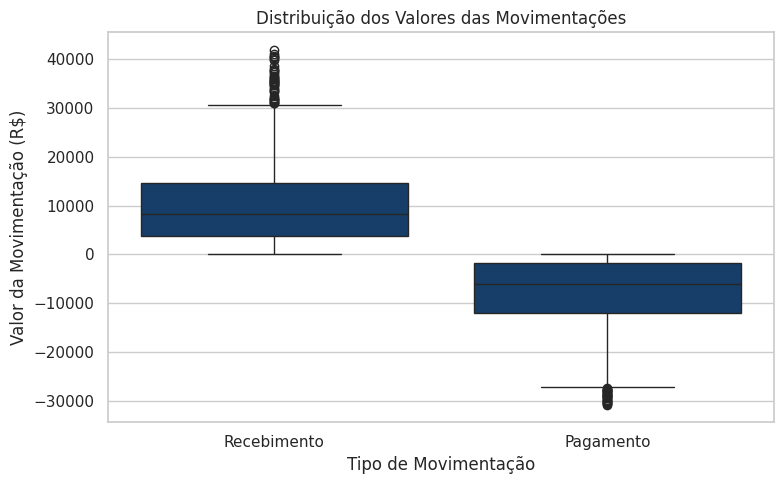

In [ ]:
# Calcular os limites de outliers usando IQR
Q1, Q3 = np.percentile(df['valor da movimentação'], [25, 75])
IQR = Q3 - Q1

# Definir um limite superior e inferior para filtrar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os valores dentro desse intervalo
df_filtrado = df[(df['valor da movimentação'] >= limite_inferior) &
                 (df['valor da movimentação'] <= limite_superior)]

# Criar o boxplot
sns.boxplot(data=df_filtrado, x='tipo', y='valor da movimentação', color='#083D77')
plt.title('Distribuição dos Valores das Movimentações')
plt.xlabel('Tipo de Movimentação')
plt.ylabel('Valor da Movimentação (R$)')
plt.tight_layout()

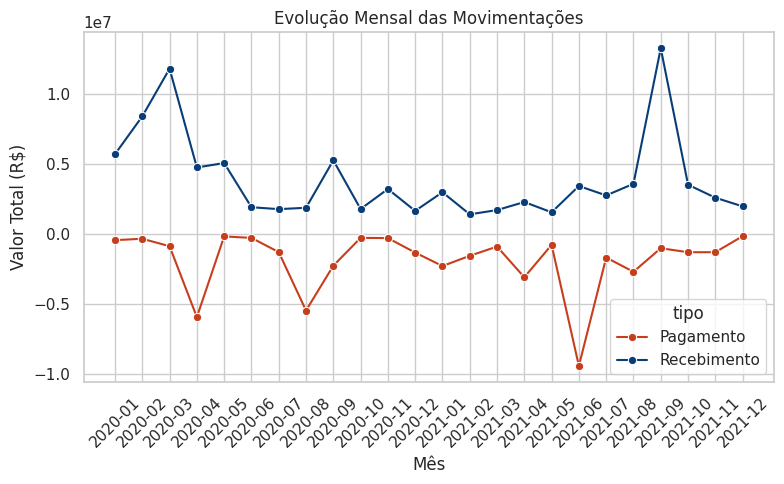

In [ ]:
# Gráfico com evolução das movimentações mensalmente
df['ano_mes'] = df['data da movimentação'].dt.to_period('M')
evolucao = df.groupby(['ano_mes', 'tipo'])['valor da movimentação'].agg(['sum', 'count']).reset_index()
evolucao['ano_mes'] = evolucao['ano_mes'].astype(str)

sns.lineplot(data=evolucao, x='ano_mes', y='sum', hue='tipo', marker='o', palette=['#C73E1D', '#083D77'])
plt.title('Evolução Mensal das Movimentações')
plt.xlabel('Mês')
plt.ylabel('Valor Total (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-17-ec4a95665295>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  formas_pag = df.groupby(['tipo', 'forma pagamento'])['valor da movimentação'].sum().unstack()


(array([0, 1]), [Text(0, 0, 'Pagamento'), Text(1, 0, 'Recebimento')])

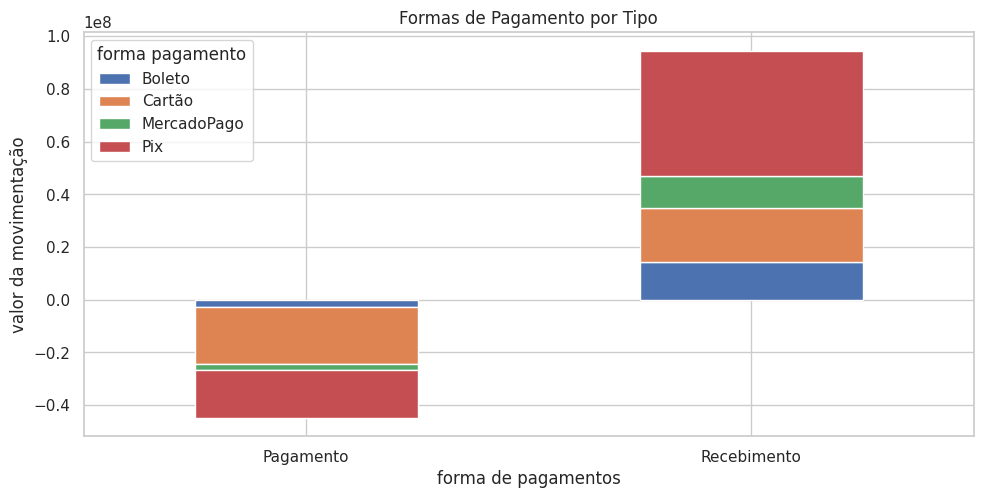

In [ ]:
# identificando formas de pagamento mais frequentes
formas_pag = df.groupby(['tipo', 'forma pagamento'])['valor da movimentação'].sum().unstack()
formas_pag.plot(kind='bar', stacked=True, figsize=(10,6), title="Formas de Pagamento por Tipo")
plt.xlabel("forma de pagamentos", fontsize=12)
plt.ylabel("valor da movimentação", fontsize=12)
plt.tight_layout()
plt.xticks(rotation=0)

In [ ]:
# Número de lojas por município
num_loja = df.groupby('município')['nome'].count().sort_values(ascending=False).reset_index()
num_loja.columns = ['município', 'count']

# Valor da movimentação por município (apenas Recebimentos)
recebi_muni = df[df['tipo'] == "Recebimento"].groupby('município')['valor da movimentação'].sum().sort_values(ascending=False).reset_index()
recebi_muni.columns = ['município', 'valor_da_movimentacao']


<ipython-input-19-81880eabeabb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=num_loja, x='município', y='count', palette='viridis')


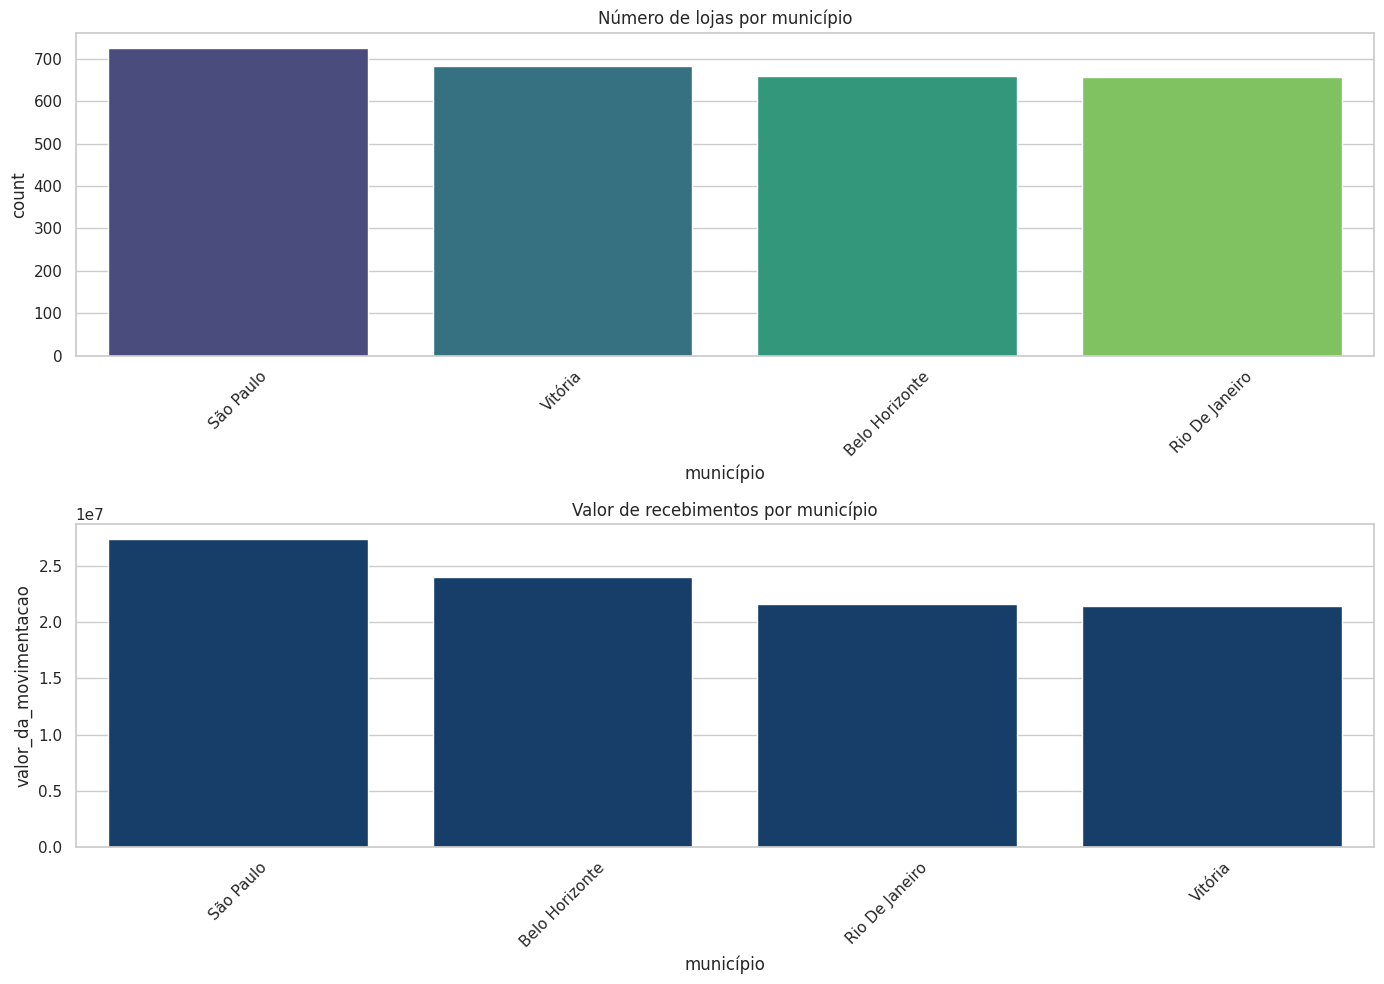

In [ ]:
# Criando a figura
plt.figure(figsize=(14, 10))

# Primeiro gráfico - número de lojas
plt.subplot(2, 1, 1)
sns.barplot(data=num_loja, x='município', y='count', palette='viridis')
plt.title("Número de lojas por município")
plt.xticks(rotation=45)

# Segundo gráfico - valor da movimentação
plt.subplot(2, 1, 2)
sns.barplot(data=recebi_muni, x='município', y='valor_da_movimentacao', color='#083D77')
plt.title("Valor de recebimentos por município")
plt.xticks(rotation=45)

plt.tight_layout()

In [ ]:
# total das movimentações
df['valor da movimentação'].sum()

np.float64(49739026.02)

<ipython-input-37-1459f802e2c7>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  formas_mensal = df_receb.groupby(['mês', 'forma pagamento'])['valor da movimentação'].sum().reset_index()


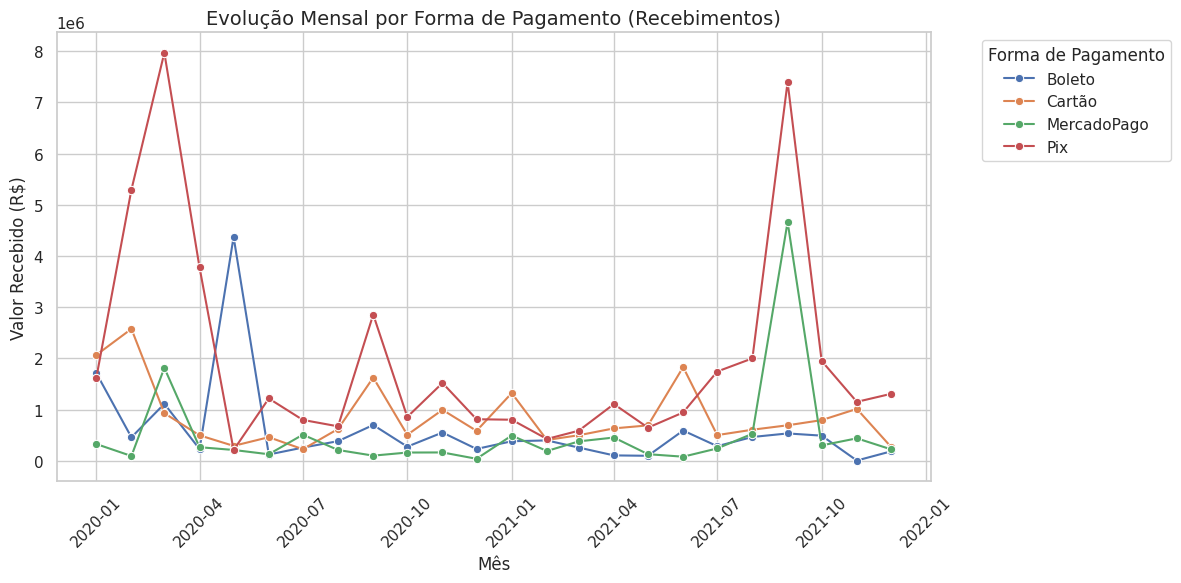

In [ ]:
# Criar coluna de mês
df['mês'] = df['data da movimentação'].dt.to_period('M').dt.to_timestamp()

# Filtrar só RECEBIMENTOS
df_receb = df[df['tipo'] == 'Recebimento']

# Agrupar por mês e forma de pagamento
formas_mensal = df_receb.groupby(['mês', 'forma pagamento'])['valor da movimentação'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=formas_mensal, x='mês', y='valor da movimentação', hue='forma pagamento', marker='o')
plt.title('Evolução Mensal por Forma de Pagamento (Recebimentos)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Valor Recebido (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Forma de Pagamento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# alguma loja responsavel por maior parte da despesa?
# agrupar lojas por tipo
# Pagamentos
lojas_pagamentos = df[df['tipo'] == 'Pagamento'].groupby('nome')['valor da movimentação'].sum().sort_values(ascending=True).head(10)
lojas_pagamentos = pd.DataFrame(lojas_pagamentos).reset_index()
lojas_pagamentos['valor da movimentação'] = lojas_pagamentos['valor da movimentação'].abs()

# Recebimentos
lojas_recebimentos =df[df['tipo'] == "Recebimento"].groupby('nome')['valor da movimentação'].sum().sort_values(ascending=False).head(10)
lojas_recebimentos = pd.DataFrame(lojas_recebimentos).reset_index()

<ipython-input-34-6ee78ab109bc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lojas_recebimentos, x='nome', y='valor da movimentação', palette='viridis')
<ipython-input-34-6ee78ab109bc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lojas_pagamentos, x='nome', y='valor da movimentação', palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Notaro Paulista'),
  Text(1, 0, 'Elian'),
  Text(2, 0, 'Unimed Poa'),
  Text(3, 0, 'Nova Olinda B'),
  Text(4, 0, 'Indaia'),
  Text(5, 0, 'Xavantina'),
  Text(6, 0, 'Yamada Matriz'),
  Text(7, 0, 'Zaccaria'),
  Text(8, 0, 'Incopisos'),
  Text(9, 0, 'Bela Vista Tijolos')])

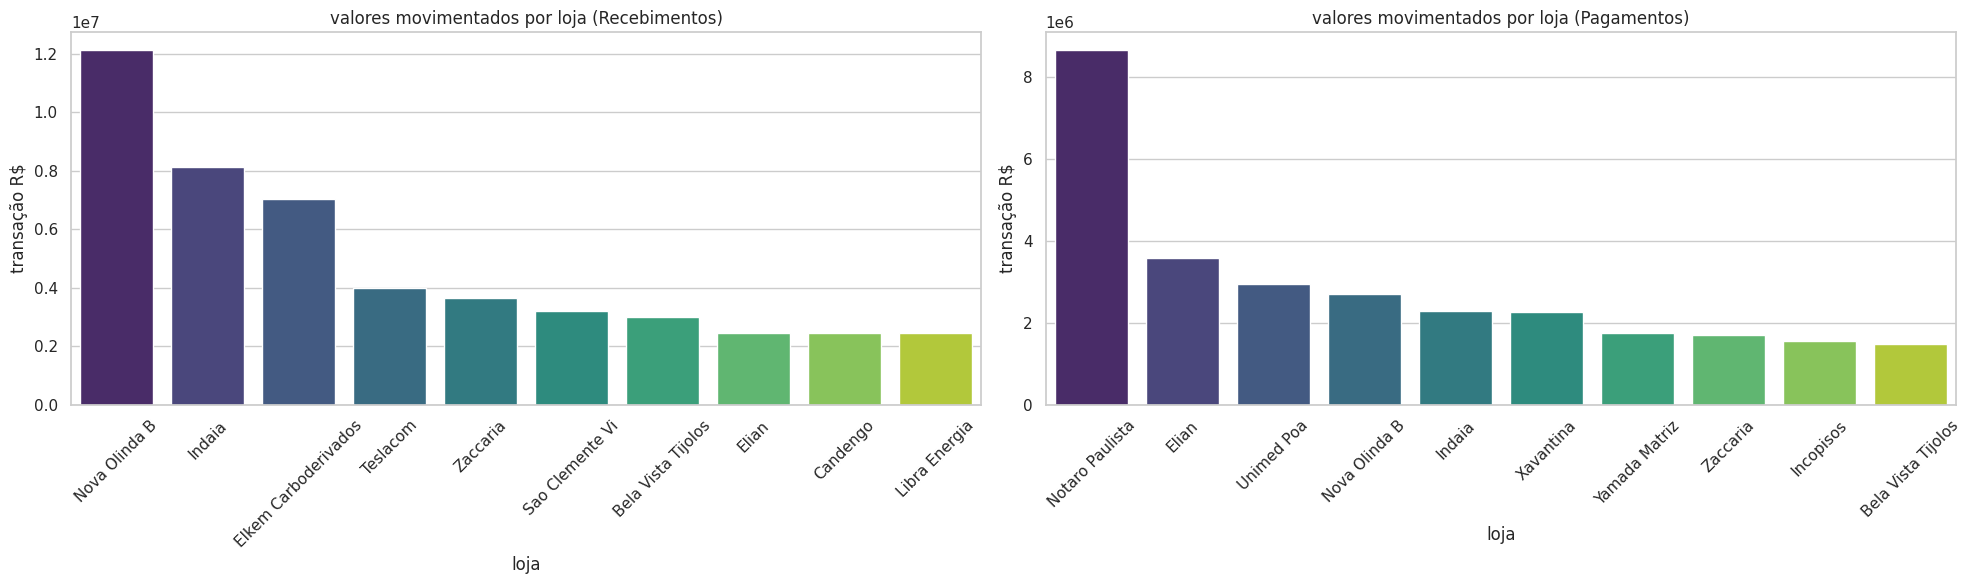

In [ ]:
# grafico de pagamentos e recebimentos por loja
#plot 1
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.barplot(data=lojas_recebimentos, x='nome', y='valor da movimentação', palette='viridis')
plt.title('valores movimentados por loja (Recebimentos)')
plt.ylabel('transação R$')
plt.xlabel('loja')
plt.tight_layout()
plt.xticks(rotation=45)

#plot 2
plt.subplot(1, 2, 2)
sns.barplot(data=lojas_pagamentos, x='nome', y='valor da movimentação', palette='viridis')
plt.title('valores movimentados por loja (Pagamentos)')
plt.ylabel('transação R$')
plt.xlabel('loja')
plt.tight_layout()
plt.xticks(rotation=45)

In [ ]:
lojas_recebimentos

,nome,valor da movimentação
0,Nova Olinda B,12129777.06
1,Indaia,8123600.57
2,Elkem Carboderivados,7053013.70
3,Teslacom,4000511.36
4,Zaccaria,3651035.34
5,Sao Clemente Vi,3208968.94
6,Bela Vista Tijolos,3001737.76
7,Elian,2455106.71
8,Candengo,2452046.58
9,Libra Energia,2450677.34


In [ ]:
lojas_pagamentos

,nome,valor da movimentação
0,Notaro Paulista,8667090.74
1,Elian,3593090.68
2,Unimed Poa,2951318.77
3,Nova Olinda B,2703968.32
4,Indaia,2297195.91
5,Xavantina,2255390.37
6,Yamada Matriz,1749458.15
7,Zaccaria,1701000.33
8,Incopisos,1561268.86
9,Bela Vista Tijolos,1475473.00


#Conclusões
##As principais conclusões extraídas desta análise foram organizadas de forma clara e objetiva no arquivo [conclusão.md](https://github.com/adrielnascimento/portifolio/blob/main/financeiro/notebooks/conclusão.md) Disponivel no reposotório
##Agradeço pela atenção!
##Se tiver um tempinho, ficarei muito feliz em receber seu feedback — ele me ajuda a melhorar ainda mais! ✅
